In [18]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import scipy
from scipy import stats

In [2]:
# reads csv using 'r' to convert normal string into raw string
df = pd.read_csv(r"C:\Users\Jordan_Kopper\Documents\DSDP_Project_Group_7\Operations-Dem-Planning_-BikeShare.csv")
df.head()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,1,1,0,0,6,0,1,37,0.81,0.0
1,2,40,1,1,1,0,6,0,1,36,0.80,0.0
2,3,32,1,1,2,0,6,0,1,36,0.80,0.0
3,4,13,1,1,3,0,6,0,1,37,0.75,0.0
4,5,1,1,1,4,0,6,0,1,37,0.75,0.0


In [3]:
#selection
df.loc[[1, 2], ['Month']]

,Month
1,1
2,1


In [4]:
#filtering mask with booleans
df['Month'] == 1

0         True
1         True
2         True
3         True
4         True
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: Month, Length: 17379, dtype: bool

In [5]:
#slicing Workdays
df[df['Workday'] == 1]

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
47,48,5,1,1,0,0,1,1,1,27,0.44,0.3582
48,49,2,1,1,1,0,1,1,1,23,0.44,0.4179
49,50,1,1,1,4,0,1,1,1,19,0.47,0.3881
50,51,3,1,1,5,0,1,1,1,19,0.47,0.2836
51,52,30,1,1,6,0,1,1,1,16,0.50,0.3881
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,119,1,12,19,0,1,1,2,34,0.60,0.1642
17375,17376,89,1,12,20,0,1,1,2,34,0.60,0.1642
17376,17377,90,1,12,21,0,1,1,1,34,0.60,0.1642
17377,17378,61,1,12,22,0,1,1,1,36,0.56,0.1343


# Data cleanning

In [6]:
#identifying Null values
df = pd.read_csv(r"C:\Users\Jordan_Kopper\Documents\DSDP_Project_Group_7\Operations-Dem-Planning_-BikeShare.csv")
#For testing:
#df.loc[47, 'Riders'] = np.nan

df.isnull().sum()

Instant        0
Riders         0
Season         0
Month          0
Hour           0
Holiday        0
Weekday        0
Workday        0
Weather        0
Temperature    0
Humidity       0
Wind           0
dtype: int64

In [7]:
df[df['Riders'].isnull()] #another option to visualize

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind


In [8]:
#check for dupplicated values on Instant
df.duplicated('Instant').sum()
#For testing:
#df.duplicated('Temperature').sum()

0

In [9]:
#checking the limits:
#Checking if there are any Negatives
df[df < 0].sum()

Instant        0.0
Riders         0.0
Season         0.0
Month          0.0
Hour           0.0
Holiday        0.0
Weekday        0.0
Workday        0.0
Weather        0.0
Temperature    0.0
Humidity       0.0
Wind           0.0
dtype: float64

In [10]:
#checking unusual high values -> Riders at 977
df.max()

Instant        17379.0000
Riders           977.0000
Season             4.0000
Month             12.0000
Hour              23.0000
Holiday            1.0000
Weekday            6.0000
Workday            1.0000
Weather            4.0000
Temperature      122.0000
Humidity           1.0000
Wind               0.8507
dtype: float64

In [11]:
#Exploring 10 highest Riders
df.nlargest(10, 'Riders')

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
14773,14774,977,3,9,18,0,3,1,1,77,0.44,0.2537
14964,14965,976,3,9,17,0,4,1,1,77,0.50,0.2239
14748,14749,970,3,9,17,0,2,1,1,79,0.28,0.0000
14725,14726,968,3,9,18,0,1,1,1,77,0.35,0.2985
15084,15085,967,4,9,17,0,2,1,1,77,0.39,0.2836
15780,15781,963,4,10,17,0,3,1,1,77,0.47,0.0000
10622,10623,957,2,3,17,0,5,1,2,81,0.42,0.1642
15108,15109,953,4,9,17,0,3,1,1,82,0.48,0.2985
15444,15445,948,4,10,17,0,3,1,1,68,0.43,0.2239
15588,15589,943,4,10,17,0,2,1,1,63,0.39,0.1940


# Plots

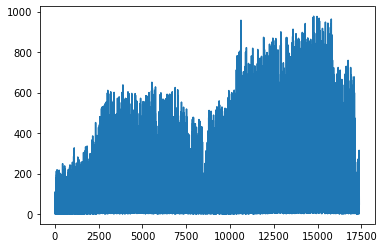

In [13]:
#Histogram for Variable distributions
#Scatterplots to visualize variables' relationships
#Boxplot to understand spread and outliers

#Plotting Riders by Instant -> 977 seems feasible for peak on second year
plt.plot(df['Instant'],df['Riders'])

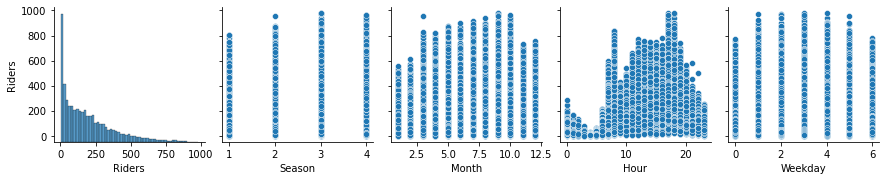

In [14]:
#check possible relationships
sb.pairplot(df.loc[:,['Riders','Season','Month','Hour','Weekday']], y_vars='Riders')

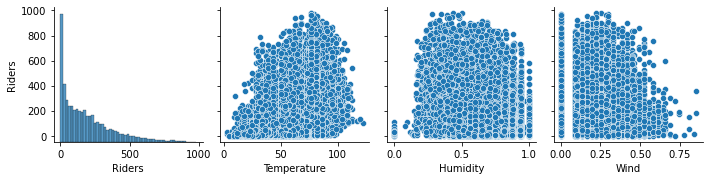

In [15]:
#check possible relationships
sb.pairplot(df.loc[:,['Riders','Temperature','Humidity','Wind']], y_vars='Riders')

<AxesSubplot:xlabel='Weekday', ylabel='Riders'>

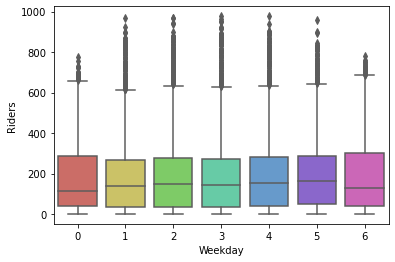

In [16]:
#checking spread and outliers
sb.boxplot(x='Weekday', y='Riders', data=df, palette='hls')

<AxesSubplot:xlabel='Weather', ylabel='Riders'>

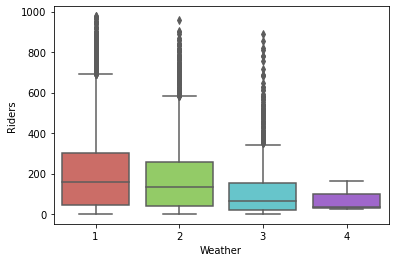

In [17]:
#checking spread and outliers
sb.boxplot(x='Weather', y='Riders', data=df, palette='hls')

# @@@@ weather 1 & 2 could have significant impact @@@@

# Statistics

In [23]:
#numerical variables
df.loc[:,['Riders','Temperature','Humidity','Wind']].describe()

,Riders,Temperature,Humidity,Wind
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,189.463088,59.719719,0.627229,0.190098
std,181.387599,20.406317,0.192930,0.122340
min,1.000000,3.000000,0.000000,0.000000
25%,40.000000,43.000000,0.480000,0.104500
50%,142.000000,61.000000,0.630000,0.194000
75%,281.000000,77.000000,0.780000,0.253700
max,977.000000,122.000000,1.000000,0.850700


In [37]:
#categorical variables
df['Riders'].groupby(df['Season']).describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
1,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
2,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
3,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
4,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


<AxesSubplot:xlabel='Hour'>

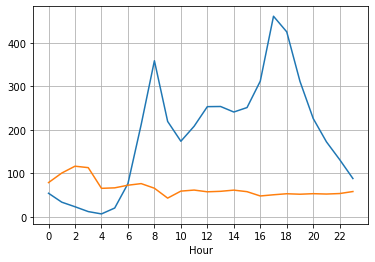

In [47]:
df['Riders'].groupby(df['Hour']).mean().plot(xticks=[0,2,4,6,8,10,12,14,16,18,20,22],grid=True)
df_std_perc = df['Riders'].groupby(df['Hour']).std() / df['Riders'].groupby(df['Hour']).mean() * 100
df_std_perc.plot(xticks=[0,2,4,6,8,10,12,14,16,18,20,22],grid=True)

#peak of average at 8AM and 5PM - rush hour from working shifts - @@@@ create categorical variable for prediction? @@@@
#standard deviation proportional to mean - keeps a flat variance